# Chapter 15. Introduction to Multimedia Data
## Notebook for Python

### 15.1 Storing, representing, and converting multimedia data

In [1]:
from PIL import Image
import requests
import numpy as np
my_image1 = Image.open(requests.get("http://cssbook.net/d/259_3_32_15.jpg", stream=True).raw)
my_image2 = Image.open(requests.get("http://cssbook.net/d/298_5_52_15.png", stream=True).raw)
print(my_image1)
print(my_image2)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=805x453 at 0x11100EAD0>
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1540x978 at 0x111089C10>


In [2]:
my_image1_L = my_image1.convert('L')
print(type(my_image1_L))
my_image1_L_array = np.array(my_image1_L)
print(type(my_image1_L_array))
print(my_image1_L_array.shape)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(453, 805)


In [3]:
my_image1_RGB = my_image1.convert('RGB')
print(type(my_image1_RGB))
my_image1_RGB_array = np.array(my_image1_RGB)
print(type(my_image1_RGB_array))
print(my_image1_RGB_array.shape)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(453, 805, 3)


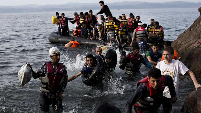

In [4]:
#Resize and visalize my_image1. Reduce to 25%
my_image1_RGB_25 = my_image1_RGB.resize((int(my_image1_RGB.width * 0.25), int(my_image1_RGB.height * 0.25)))
my_image1_RGB_25

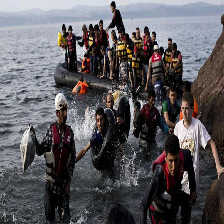

In [5]:
#Resize and visalize my_image1. Resize to 224 x 224
my_image1_RGB_224 = my_image1_RGB.resize((224,224))
my_image1_RGB_224

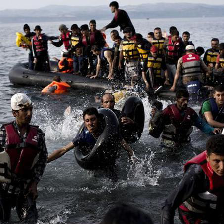

In [6]:
#Crop and resize to 224 x 224

#Function adapted from Webb, Casas & Wilkerson (2020)
def crop(img):
    height = img.height
    width = img.width
    hw_dif = abs(height - width)
    hw_halfdif = hw_dif / 2
    crop_leftright = width > height
    if crop_leftright:
        y0 = 0
        y1 = height
        x0 = 0 + hw_halfdif
        x1 = width - hw_halfdif        
    else:
        y0 = 0 + hw_halfdif
        y1 = height - hw_halfdif
        x0 = 0
        x1 = width
    return img.crop((x0, y0, x1, y1))

my_image1_RGB_crop = crop(my_image1_RGB)
my_image1_RGB_crop_224 = my_image1_RGB_crop.resize((224,224))
my_image1_RGB_crop_224

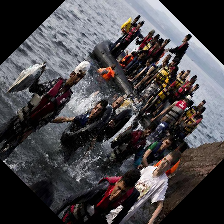

In [7]:
#Rotate 45 degrees
my_image1_RGB_224_rot = my_image1_RGB_224.rotate(-45)
my_image1_RGB_224_rot

In [8]:
#Create two 15x15 small images to compare

#image1
my_image1_RGB_crop_15 = my_image1_RGB_crop_224.resize((15,15))
#image2
my_image2_RGB = my_image2.convert('RGB')
my_image2_RGB_crop = crop(my_image2_RGB)
my_image2_RGB_crop_224 = my_image2_RGB_crop.resize((224,224))
my_image2_RGB_crop_15 = my_image2_RGB_crop_224.resize((15,15))

img_vect1 = np.array(my_image1_RGB_crop_15).flatten()
img_vect2 = np.array(my_image2_RGB_crop_15).flatten()

matrix = np.row_stack((img_vect1, img_vect2))

from sklearn.metrics.pairwise import cosine_similarity
sim_mat = cosine_similarity(matrix)
sim_mat

array([[1.        , 0.75303996],
       [0.75303996, 1.        ]])

### 15.2 Image classification

#### 15.2.1 Basic classification with shallow algorithms

In [9]:
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print("Shape = ", X.shape)
print("Numbers in training set= ", y_train[0:10])
print("Numbers in test set= ", y_test[0:10])

Shape =  (70000, 784)
Numbers in training set=  [5 0 4 1 9 2 1 3 1 4]
Numbers in test set=  [7 2 1 0 4 1 4 9 5 9]


In [10]:
#Multiclass classification with RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
print(forest_clf)
print("Predict the first 10 numbers of our set:", 
      forest_clf.predict([X_test[0], X_test[1], X_test[2], X_test[3], X_test[4], X_test[5], X_test[6], X_test[7], X_test[8], X_test[9]]))

predictions = forest_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Predict the first 10 numbers of our set: [7 2 1 0 4 1 4 9 5 9]
Accuracy:  0.9705


#### 15.2.2 Deep Learning for Image Analysis

In [47]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [52]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5, verbose=2, validation_split=0.1)

print("Evaluation: ")
print(model.evaluate(X_test, y_test))

Epoch 1/5
1688/1688 - 2s - loss: 0.7204 - accuracy: 0.7606 - val_loss: 0.5124 - val_accuracy: 0.8192
Epoch 2/5
1688/1688 - 2s - loss: 0.4864 - accuracy: 0.8313 - val_loss: 0.5074 - val_accuracy: 0.8182
Epoch 3/5
1688/1688 - 2s - loss: 0.4426 - accuracy: 0.8462 - val_loss: 0.4233 - val_accuracy: 0.8512
Epoch 4/5
1688/1688 - 2s - loss: 0.4146 - accuracy: 0.8564 - val_loss: 0.4469 - val_accuracy: 0.8345
Epoch 5/5
1688/1688 - 2s - loss: 0.3941 - accuracy: 0.8625 - val_loss: 0.4029 - val_accuracy: 0.8582
Evaluation: 
313/313 [==============================] - 0s 914us/step - loss: 0.4369 - accuracy: 0.8467
[0.43691107630729675, 0.8467000126838684]


In [50]:
X_new = X_test[:6]
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

#### 15.2.3 Fine tuning an open source  CNN

### 15.3 Using existing libraries and APIs